In [13]:
# Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_text
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
import random
print("Libraries imported successfully!!")

Libraries imported successfully!!


In [3]:
df = pd.read_csv(r'C:\Users\LENOVO L14\Downloads\Jupyter Notebook\IOT-temp.csv')
print("Dataset has been located and read!!")

Dataset has been located and read!!


In [4]:
# Dataset Shape
print("Dataset Shape:")
print(df.shape)

Dataset Shape:
(97606, 5)


In [5]:
df.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In


In [6]:
# Summary statistics for the entire dataset
summary = {
    'count': df['temp'].count(),
    'max': df['temp'].max(),
    'min': df['temp'].min(),
    'mean': round(df['temp'].mean(), 3),
    'median': df['temp'].median(),
    'mode': df['temp'].mode().values[0],
    'std': round(df['temp'].std(), 3), 
    'var': round(df['temp'].var(), 3) 
}

In [7]:
# Displaying summary statistics of the entire dataset
print("Summary Statistics:")
for key, value in summary.items():
    print(f"{key} = {value}")

Summary Statistics:
count = 97606
max = 51
min = 21
mean = 35.054
median = 35.0
mode = 39
std = 5.7
var = 32.488


In [8]:
# Summary statistics grouped by 'outside' and 'inside'
summary_grouped = df.groupby('out/in')['temp'].agg(['count', 'max', 'min', 'mean', 'median', 'std', 'var'])
quantiles_grouped = df.groupby('out/in')['temp'].quantile([0.25, 0.5, 0.75])
summary_grouped['25%'] = quantiles_grouped.loc[:, 0.25]
summary_grouped['50%'] = quantiles_grouped.loc[:, 0.5]
summary_grouped['75%'] = quantiles_grouped.loc[:, 0.75]
summary_grouped['iqr'] = summary_grouped['75%'] - summary_grouped['25%']

In [9]:
# Display grouped summary statistics
print("Grouped Summary Statistics:")
print(summary_grouped)

Grouped Summary Statistics:
        count  max  min       mean  median       std        var   25%   50%  \
out/in                                                                        
In      20345   41   21  30.453920    31.0  2.238101   5.009096  29.0  31.0   
Out     77261   51   24  36.265244    37.0  5.717055  32.684719  31.0  37.0   

         75%  iqr  
out/in             
In      32.0  3.0  
Out     40.0  9.0  


In [15]:
# Data preprocessing by converting string("out/in") to binary
convert = {"out/in": {"Out": 1, "In": 0}}
df = df.replace(convert)
df.head()

X = df[['temp']]  # Features
Y = df[['out/in']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [16]:
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [17]:
Y_pred = clf.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)

In [18]:
# Displaying model evaluation results
print(f'Accuracy: {accuracy:.2f}')
print("Precision:", precision)
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.82
Precision: 0.8400317892824705
Confusion Matrix:
[[ 575 1409]
 [ 378 7399]]


In [19]:
# Display tree as text
tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)

|--- temp <= 35.50
|   |--- temp <= 28.50
|   |   |--- temp <= 26.50
|   |   |   |--- temp <= 25.50
|   |   |   |   |--- temp <= 24.50
|   |   |   |   |   |--- temp <= 23.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- temp >  23.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- temp >  24.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- temp >  25.50
|   |   |   |   |--- class: 0
|   |   |--- temp >  26.50
|   |   |   |--- temp <= 27.50
|   |   |   |   |--- class: 1
|   |   |   |--- temp >  27.50
|   |   |   |   |--- class: 1
|   |--- temp >  28.50
|   |   |--- temp <= 31.50
|   |   |   |--- temp <= 29.50
|   |   |   |   |--- class: 1
|   |   |   |--- temp >  29.50
|   |   |   |   |--- temp <= 30.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- temp >  30.50
|   |   |   |   |   |--- class: 1
|   |   |--- temp >  31.50
|   |   |   |--- temp <= 32.50
|   |   |   |   |--- class: 0
|   |   |   |--- temp >  32.50
|   |   |   |   |--- temp <= 33.5

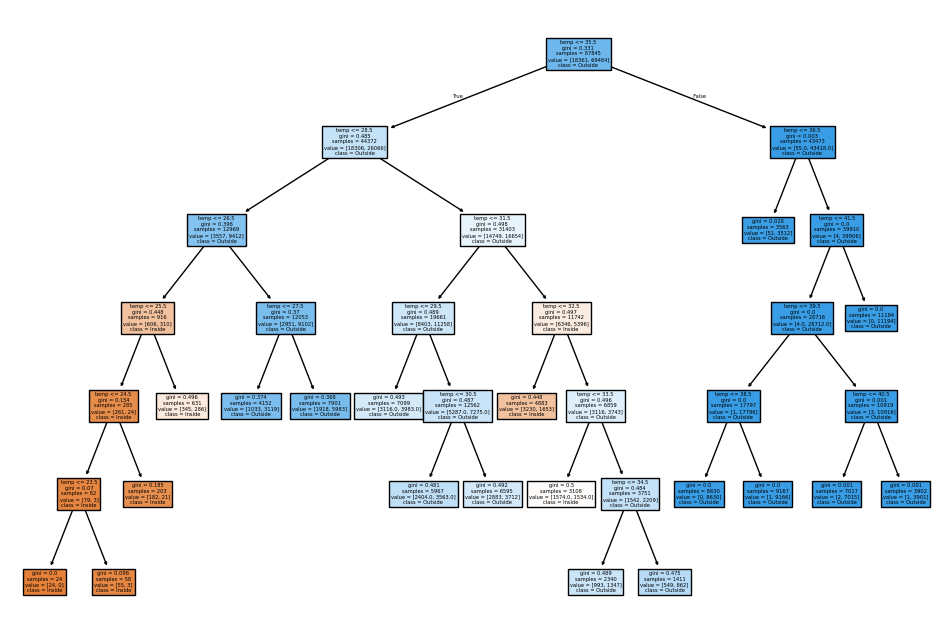

In [21]:
# Plot the decision tree
fig, ax = plt.subplots(figsize=(12, 8))
tree.plot_tree(clf, feature_names=X.columns.to_list(), class_names=['Inside', 'Outside'], filled=True)
plt.savefig(r'C:\Users\LENOVO L14\Downloads\Jupyter Notebook\Decision Tree Plot.png')
plt.show()

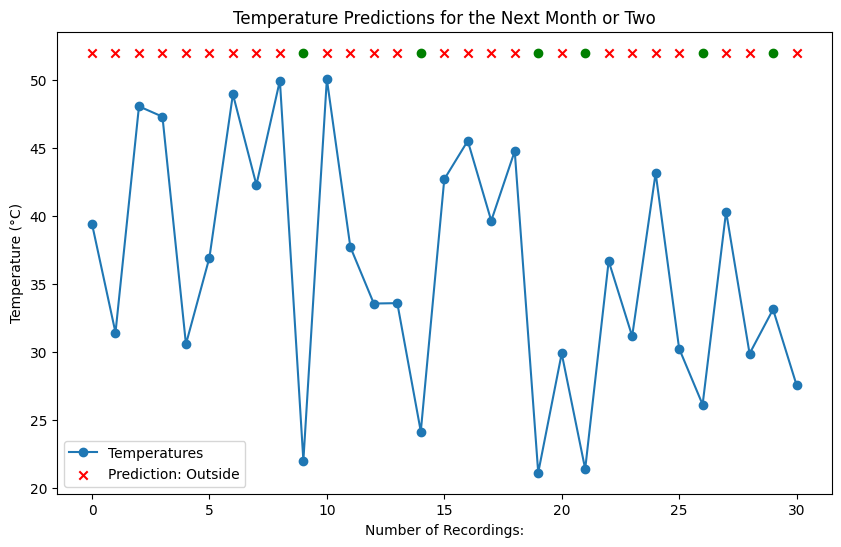

In [26]:
# Feature names
feature_names = ['temp'] 

# Number of samples
num_of_samples = 31

# Generate random temperatures
random_temperatures = [random.uniform(21, 51) for _ in range(num_of_samples)]

# Convert to DataFrame to match training format
future_temperature_data = pd.DataFrame(random_temperatures, columns=feature_names)

# Make predictions
future_predictions = clf.predict(future_temperature_data)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(np.arange(num_of_samples), random_temperatures, label='Temperatures', marker='o')

for i, prediction in enumerate(future_predictions):
    if prediction == 1:
        plt.scatter(i, 52, color='r', label='Prediction: Outside' if i == 0 else "", marker='x')
    else:
        plt.scatter(i, 52, color='g', label='Prediction: Inside' if i == 0 else "", marker='o')

plt.xlabel('Number of Recordings:')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Predictions for the Next Month or Two')
plt.legend()
plt.show()